In [12]:
"""
可视化[类激活热力图] Grad-CAM
参考：https://blog.csdn.net/Sylvia_Lan/article/details/123309476
"""
import torchvision
import torch
import os
import numpy as np
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image

os.environ['TORCH_HOME'] = 'D:\Projects\D2L\data\pretrain_weights'      # 指定pretrain的下载位置

In [2]:
# 加载模型
model = torchvision.models.vgg11(pretrained=True)   # 三个部分：features avgpool classifier

In [3]:
# 选择目标层
target_layer = model.features[-1]   # 选择features网络部分的最后一层，看他在原图上的激活情况

In [4]:
# 读取示例图像
img_path = r'D:\Projects\D2L\data\myperson\test\car\IMG_20221218_163747.jpg'
img = Image.open(img_path).convert('RGB')   # H W C; 转一下RGB可能是为了保险起见，万一图片是灰度图呢; 都是整数，应转为float
img_np = np.asarray(img, dtype=np.float32) / 255    # 转为float并归一化
img_tensor = torch.from_numpy(img_np).permute(2, 0, 1).unsqueeze(0)     # H W C -->B C H W

In [5]:
# 初始化GradCAM
# 使用模型、可视化目标层来初始化
cam = GradCAM(model=model, target_layers=[target_layer], use_cuda=False)     # target_layers要求是可迭代对象; 我的GPU显存不够

In [6]:
# 选择目标类别
# 若不设置，默认为分数最高的类
targets = None
# targets = [ClassifierOutputTarget(281)]   第281类

In [24]:
# 计算cam
# aug_smooth=True(应用水平翻转组合，并通过[1.0，1.1，0.9]对图像进行多路复用，使CAM围绕对象居中)
#eigen_smooth=True(去除大量噪声)
img_tensor = torchvision.transforms.Resize([224, 224])(img_tensor)      # 适应model的输入大小
cam_res = cam(input_tensor=img_tensor, targets=targets, aug_smooth=True, eigen_smooth=True)     # (1, 224, 224)
# 所有的样本均有热力图，我们选一张进行可视化
cam_res = cam_res[0, :]

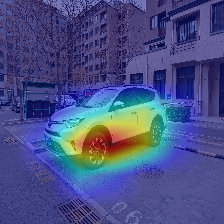

In [28]:
# 绘图
cam_image = show_cam_on_image(img=img_tensor.squeeze(0).permute(1, 2, 0).numpy(), mask=cam_res, use_rgb=True)     # 参数img是nparray，mask是预测cam计算结果
Image.fromarray(cam_image)